# Data Preprocessing

## Imports

In [12]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [23]:
from df_overview import DfOverview
from df_outlier import DfOutlier
from file_handler import FileHandler

## Data

- ID number
- Diagnosis(M=malignant, B=benign)
- radius(mean of distances from center to points on the perimeter)
- texture(standard deviation of gray - scale values)
- perimeter
- area
- smoothness(local variation in radius lengths)
- compactness(perimeter ^ 2 / area - 1.0)
- concavity(severity of concave portions of the contour)
- concave points(number of concave portions of the contour)
- symmetry
- fractal dimension("coastline approximation" - 1)
- The mean, standard error and "worst" or largest(mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
- All feature values are recoded with four significant digits.
- Missing attribute values: none
- Class distribution: 357 benign, 212 malignant


## Data reading

In [24]:
fh = FileHandler()
df = fh.read_csv("../data/data.csv")
df.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


### Missing value

In [15]:
store_overview = DfOverview(df)
store_overview.getOverview()

,count,none_count,none_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
id,569,0,0.0%,569,100.0%,int64
symmetry_worst,569,0,0.0%,500,87.87%,float64
concave points_worst,569,0,0.0%,492,86.47%,float64
concavity_worst,569,0,0.0%,539,94.73%,float64
compactness_worst,569,0,0.0%,529,92.97%,float64
smoothness_worst,569,0,0.0%,411,72.23%,float64
area_worst,569,0,0.0%,544,95.61%,float64
perimeter_worst,569,0,0.0%,514,90.33%,float64
texture_worst,569,0,0.0%,511,89.81%,float64


There are 2 things that take my attention:
- We can see that we don't have any missing values, except for column 32, which has no value. 
- the only categorical data is diagnosis

In [28]:
y = df.diagnosis # M or B
x = df.drop(['Unnamed: 32', 'id', 'diagnosis'], axis=1)

### Outliers


In [27]:
df_outliers = DfOutlier(x.copy())
overview = df_outliers.getOverview()
overview

,number_of_outliers,percentage_of_outliers,skew,Q1,Median,Q3
label,,,,,,
concave points_worst,0,0.0%,0.49,0.06,0.10,0.16
texture_worst,5,0.88%,0.50,21.08,25.41,29.72
smoothness_mean,6,1.05%,0.46,0.09,0.10,0.11
texture_mean,7,1.23%,0.65,16.17,18.84,21.80
smoothness_worst,7,1.23%,0.42,0.12,0.13,0.15
concave points_mean,10,1.76%,1.17,0.02,0.03,0.07
concavity_worst,12,2.11%,1.15,0.11,0.23,0.38
perimeter_mean,13,2.28%,0.99,75.17,86.24,104.10
radius_mean,14,2.46%,0.94,11.70,13.37,15.78


Before violin and swarm plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

In [49]:
def normalizer(df):
    return (df - df.mean()) / (df.std())

In [50]:
normal_x = normalizer(x)

In [51]:
def violin_plot(x, y, start: int = 0, num_features: int = 10):
  data = pd.concat([y, x.iloc[:, start:num_features]], axis=1)
  data = pd.melt( data, 
                  id_vars="diagnosis",
                  var_name="features",
                  value_name='value')
  plt.figure(figsize=(20, 12))
  sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
  plt.xticks(rotation=90)
  plt.show()

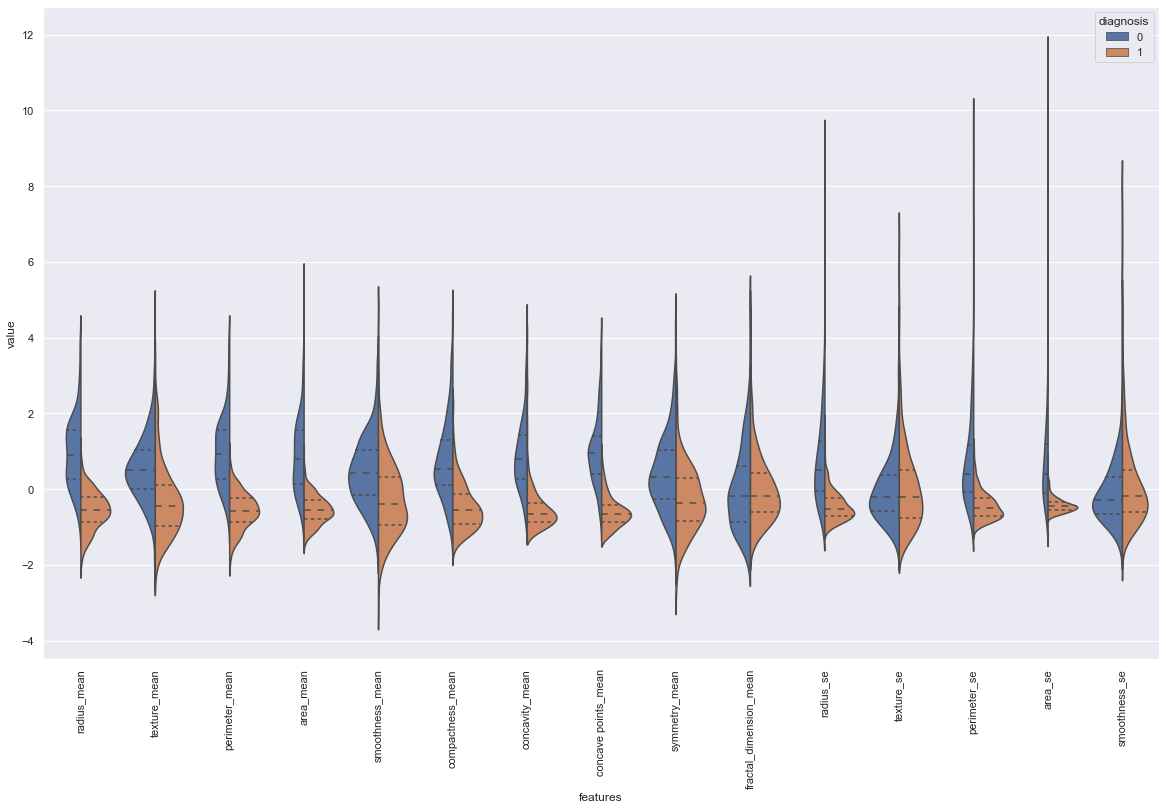

In [52]:
violin_plot(normal_x, y, 0, 15)

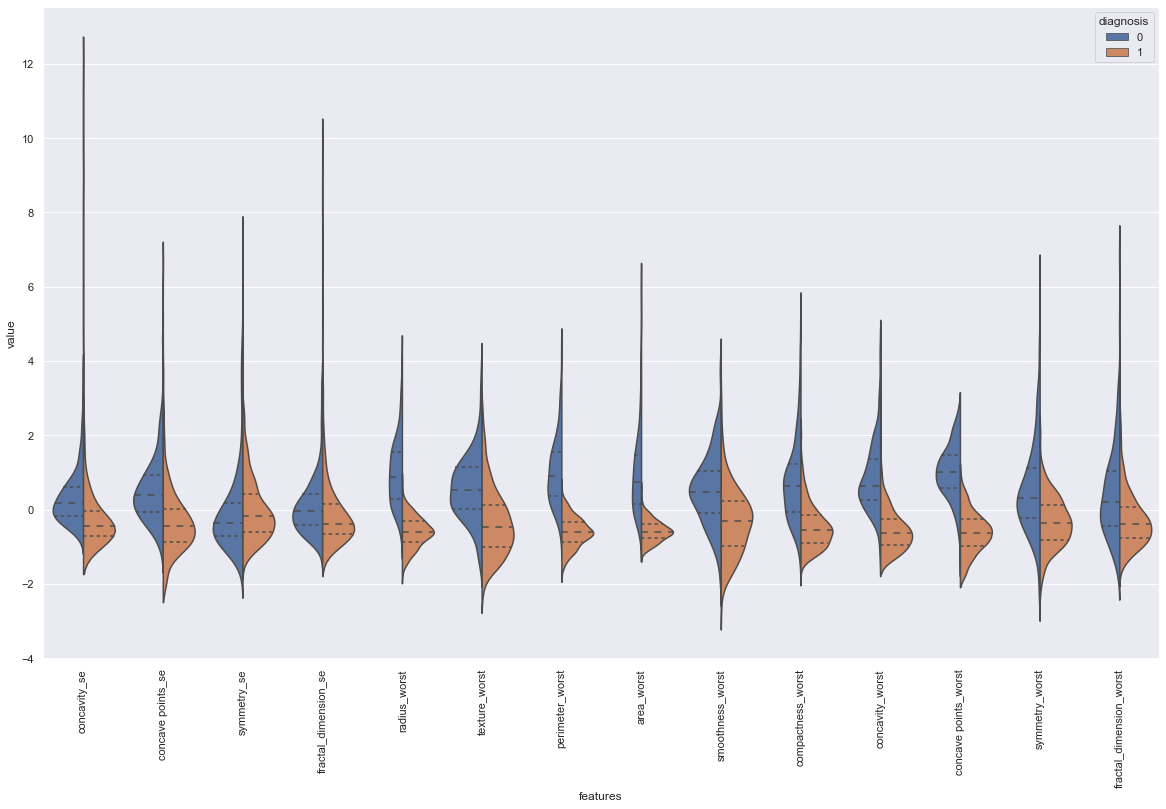

In [54]:
violin_plot(normal_x, y, 16, 31)

In [60]:
def get_box_plot(x, y, start: int = 0, num_features: int = 10):
    data = pd.concat([y, x.iloc[:, start:num_features]], axis=1)
    data = pd.melt(data,
                   id_vars="diagnosis",
                   var_name="features",
                   value_name='value')
    plt.figure(figsize=(20, 12))
    sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
    plt.xticks(rotation=90)
    plt.show()


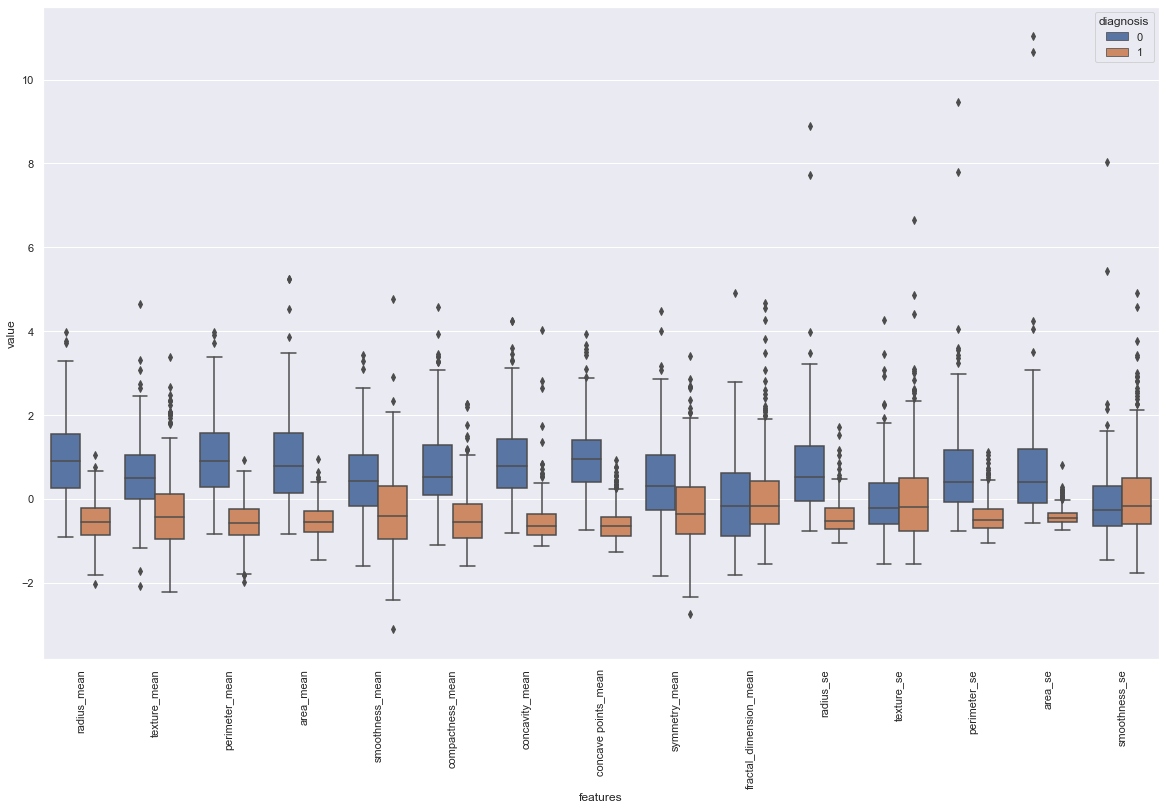

In [61]:
get_box_plot(normal_x, y, 0, 15)

In [ ]:
get_box_plot(normal_x, y, 16, 31)